# IMPORT LIBRARY

In [7]:
import pandas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# LOAD THE DATA & SEPARATE THE TARGET

In [8]:
iowa_file_path = './Dataset/train.csv'
home_data = pandas.read_csv(iowa_file_path)

home_data.shape

(1460, 81)

# DEFINE THE FEATURES

In [9]:
# Target
y = home_data.SalePrice

In [10]:
# Select numerical data for features
features = home_data.select_dtypes(exclude=['object']).columns.to_list()[1:-1]
features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

# COLUMNS WHICH CORRESPOND TO FEATURES

In [11]:
X = home_data[features]
X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,240,366,0,112,0,0,0,0,4,2010


## Data Cleaning

### Missing Values

In [24]:
total_miss = X.isna().sum().sort_values(ascending=False)
total_non_miss = X.isna().count()
percentage_miss = (total_miss / total_non_miss).sort_values(ascending=False)

missing_data = pandas.concat([total_miss, total_non_miss, percentage_miss], axis=1, keys=['Total Miss', 'Total Non Miss', 'Percentage Miss'])
missing_data[missing_data['Total Miss']>0]

,Total Miss,Total Non Miss,Percentage Miss
LotFrontage,259,1460,0.177397
GarageYrBlt,81,1460,0.055479
MasVnrArea,8,1460,0.005479


In [7]:
X.dropna(axis=1, inplace=True)
X.isna().sum()

/var/folders/vs/9m6hqff97kv6hpz3sxt392sm0000gn/T/ipykernel_11100/3073856206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=1, inplace=True)


MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [28]:
X.shape

(1460, 33)

# SPLIT INTO VALIDATION AND TRAINING DATA

In [8]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# DEFINE A RANDOM FOREST MODEL

In [12]:
rf_model = RandomForestRegressor(random_state=1)

# Fit / Train a model
rf_model.fit(train_X, train_y)

RandomForestRegressor(random_state=1)

In [13]:
# Validation Predictions
rf_val_predictions = rf_model.predict(val_X)
rf_val_predictions

array([208584.37      , 165125.52      , 115433.58      ,  78955.22      ,
       149772.59      , 339302.78      , 292600.86      , 147832.43      ,
       222026.99      , 228250.89      , 173509.59      ,  76929.8       ,
       198015.72      , 360248.26      , 241483.79      , 113840.        ,
       116745.4       , 120659.55      , 200805.2       , 126872.1       ,
       120731.        , 118965.23      , 273830.8       , 311057.71      ,
        98455.        , 184346.68      , 129660.91      , 190117.17      ,
       441555.07      , 136131.17      , 126451.06      , 113848.66      ,
       121592.08      ,  93868.3       , 146517.59      , 342673.09      ,
       123121.        ,  86563.5       , 264053.93      , 111521.58      ,
       153649.8       , 147163.5       , 103955.71      , 125059.62      ,
       178988.        , 180366.        , 129456.02      , 178130.44      ,
       261440.92      , 249671.25      , 109206.5       , 284198.65      ,
       117437.        , 2

In [20]:
# Calculate the Mean Absolute Error
rf_val_mae = mean_absolute_error(val_y, rf_val_predictions)
# print("The Mean Absolute Error for validation data:", rf_val_mae)
print("Validation MAE for Random Forest Model: {:,.2f}". format(rf_val_mae))

Validation MAE for Random Forest Model: 16,926.22


# TRAIN MODEL FOR COMPETITION

In [21]:
# To improve accuracy, create a new Random Forest Model
# which you will train on all training data

rf_model_full_data = RandomForestRegressor(random_state=1)

# Fit rf_model_full_data on all data from training data to in-sample data
rf_model_full_data.fit(X, y)

RandomForestRegressor(random_state=1)

# APPLYING MODEL FOR PREDICTIONS IN ANOTHER DATA

In [22]:
test_data_path = './Dataset/test.csv'

# read the file using pandas
test_data = pandas.read_csv(test_data_path)
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# TEST DATA — DEFINE FEATURES

In [25]:
# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_data.columns

test_X = test_data[features]
test_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0.0,80,32,0,0,0,0,700,7,2006


## TEST DATA - Data Cleaning

In [29]:
test_X.shape

(1459, 36)

In [33]:
test_X.isna().sum()

MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [37]:
test_X1 = test_X.drop(columns=["LotFrontage", "MasVnrArea", "GarageYrBlt"])
test_X1.shape

(1459, 33)

In [40]:
test_X1.dropna(inplace=True)
test_X1.shape

(1456, 33)

# PREDICTIONS FOR SUBMISSION

In [41]:
test_preds = rf_model_full_data.predict(test_X1)
test_preds

array([127685.51, 156516.4 , 179008.  , ..., 162586.87, 112429.  ,
       234485.27])

# VISUALISATION

In [69]:
import matplotlib.pyplot as pyplot

pyplot.style.use('fivethirtyeight')

home_data["YrSold"].mean()

2007.8157534246575

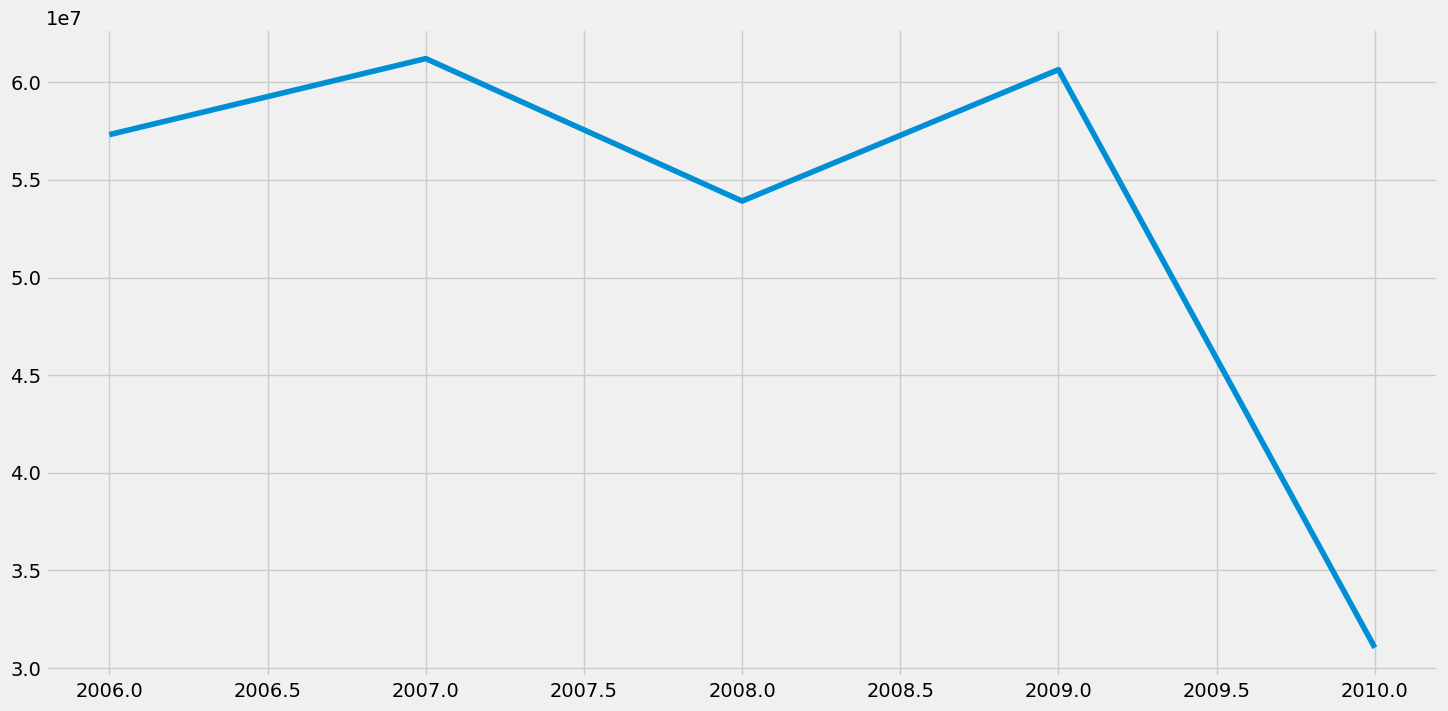

In [96]:
yearly = home_data.groupby("YrSold").agg('sum').reset_index()
pyplot.figure(figsize=(16,8))
pyplot.plot(yearly["YrSold"], yearly["SalePrice"])
# yearly.plot(x="YrSold", y="Saleprice",kind="bar")